### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

      date  passengers
0  1949-01       112.0
1  1949-02       118.0
2  1949-03       132.0
3  1949-04       129.0
4  1949-05       121.0
        date  passengers  mese_numerico
0 1949-01-01       112.0              1
1 1949-02-01       118.0              2
2 1949-03-01       132.0              3
3 1949-04-01       129.0              4
4 1949-05-01       121.0              5


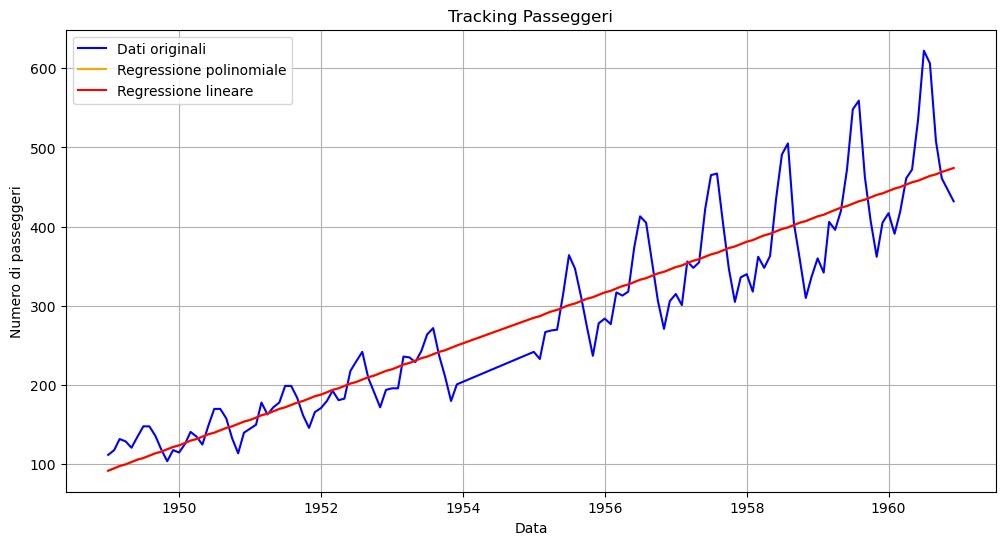

RMSE Regressione lineare: 45.67701077103337
RMSE Regressione polinomiale: 45.67701077103337


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
import plotly.express as px

#1
df = pd.read_csv("dataPassengers.csv")
print(df.head())

#2
df['date'] = pd.to_datetime(df['date'])
inizio = pd.to_datetime('1949-01')
df['mese_numerico'] = ((df['date'].dt.year - inizio.year) * 12 + (df['date'].dt.month - inizio.month) + 1)
print(df.head())

#3
df.dropna(inplace=True)
model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
model.fit(df[['mese_numerico']], df['passengers'])
yPred = model.predict(df[['mese_numerico']])
yPred = np.maximum(0, np.round(yPred)).astype(int)
model_linear = LinearRegression()
model_linear.fit(df[['mese_numerico']], df['passengers'])
yPredLinear = model_linear.predict(df[['mese_numerico']])
yPredLinear = np.maximum(0, np.round(yPredLinear)).astype(int)

plt.figure(figsize=(12, 6))
plt.title('Tracking Passeggeri')
plt.plot(df['date'], df['passengers'], label='Dati originali', color='blue')
plt.plot(df['date'], yPred, label='Regressione polinomiale', color='orange')
plt.plot(df['date'], yPredLinear, label='Regressione lineare', color='red')
plt.xlabel('Data')
plt.ylabel('Numero di passeggeri')
plt.legend()
plt.grid()
plt.show()

#4
print(f"RMSE Regressione lineare: {root_mean_squared_error(df['passengers'], yPredLinear)}")
print(f"RMSE Regressione polinomiale: {root_mean_squared_error(df['passengers'], yPred)}")

#5
df['y_pred_poly'] = yPred
df['y_pred_linear'] = yPredLinear
fig = px.line(df, x='date', y=['passengers', 'y_pred_poly', 'y_pred_linear'],labels={'value': 'N. Passeggeri'},title='Tracking N. Passeggeri nel tempo con regressione')
fig.update_traces(mode='lines+markers')
fig.show()


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [12]:
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

#1
x = np.linspace(-3, 3, 100)
print(x[:10])

#2
y = x**3 - x + np.random.normal(0, 0.5, x.shape)
print(y[:10])

#3
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H3("Seleziona grado polinomio"),
    dcc.Slider(
        id="grado",
        min=1,
        max=10,
        step=1,
        value=1,
        marks={i: str(i) for i in range(1, 11)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    dcc.Graph(id="grafico")
])

@app.callback(
    Output("grafico", "figure"),
    Input("grado", "value")
)
def aggiorna_grafico(grado):
    coeff = np.polyfit(x, y, grado)
    p = np.poly1d(coeff)
    y_pred = p(x)
    fig = go.Figure()
    fig.add_scatter(x=x, y=y, mode="markers", name="Dati")
    fig.add_scatter(x=x, y=y_pred, mode="lines", name=f"Fit grado {grado}")
    fig.update_layout(title=f"Polinomio di grado {grado}", template="simple_white")
    return fig

if __name__ == "__main__":
    app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'